In [1]:
from pathlib import Path
home = Path.home()
#[x for x in home.iterdir()]

In [2]:
inpD = 'notebooks/data/Animesh/Lymphoma'
#[x for x in (home/inpD).iterdir()]

In [3]:
inpF="proteinGroups.txt"
import pandas as pd
df = pd.read_table(home/inpD/inpF)
df.describe()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (594,595) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Peptides 161205_1_19913,Peptides 161205_10_29288,Peptides 161205_11_13476,Peptides 161205_12_22298,Peptides 161205_13_15972,Peptides 161205_14_16003,...,LFQ intensity H 161205_5_7730,LFQ intensity L 161205_6_23854,LFQ intensity H 161205_6_23854,LFQ intensity L 161205_7_27283,LFQ intensity H 161205_7_27283,LFQ intensity L 161205_8_16846,LFQ intensity H 161205_8_16846,LFQ intensity L 161205_9_1702,LFQ intensity H 161205_9_1702,id
count,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,...,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5208.000000
mean,3.544931,7.363671,6.814132,6.317588,3.616743,4.364823,3.298003,3.607335,3.811444,3.661674,...,4.552854e+07,4.414972e+07,3.723839e+07,5.362148e+07,3.743154e+07,4.284464e+07,3.876076e+07,3.898194e+07,4.191519e+07,2603.500000
std,3.084355,7.762031,7.611536,7.140725,4.786894,5.668569,4.938949,4.833387,5.036964,4.860842,...,2.617129e+08,3.969618e+08,2.169072e+08,4.983421e+08,2.296025e+08,3.704850e+08,2.208950e+08,3.189844e+08,2.491729e+08,1503.564432
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.553650e+05,1.038175e+05,2.498850e+05,2.716200e+05,1.372850e+05,2.279600e+05,1301.750000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.053150e+06,3.065500e+06,2.783350e+06,3.299250e+06,2.554100e+06,2.874950e+06,2.951950e+06,2.568050e+06,2.841100e+06,2603.500000
75%,5.000000,9.000000,8.000000,8.000000,5.000000,6.000000,4.000000,5.000000,5.000000,5.000000,...,1.611500e+07,1.392975e+07,1.351975e+07,1.592375e+07,1.323400e+07,1.409600e+07,1.451350e+07,1.268725e+07,1.472775e+07,3905.250000
max,40.000000,108.000000,108.000000,108.000000,63.000000,74.000000,65.000000,61.000000,68.000000,68.000000,...,9.356300e+09,2.113200e+10,8.056900e+09,2.023200e+10,9.254800e+09,1.474300e+10,7.931300e+09,1.427000e+10,9.927700e+09,5207.000000


In [4]:
import vaex
ds = vaex.from_pandas(df)
xcounts = ds.count()
print(xcounts)

5208


In [71]:
#df.isnull().sum().sort_index()/len(df)
ds.count()#.sort_index()/len(ds)

array(5208)

In [72]:
#display(df.head().transpose())

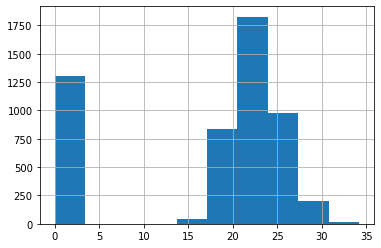

In [7]:
import numpy as np
#df['Ratio H/L normalized 161205_1_19913'].apply(np.log2).hist()
(df['LFQ intensity L 161205_1_19913']+1).apply(np.log2).hist()

In [8]:
df.columns

Index(['Protein IDs', 'Majority protein IDs', 'Peptide counts (all)',
       'Peptide counts (razor+unique)', 'Peptide counts (unique)',
       'Protein names', 'Gene names', 'Fasta headers', 'Number of proteins',
       'Peptides',
       ...
       'Peptide IDs', 'Peptide is razor', 'Mod. peptide IDs', 'Evidence IDs',
       'MS/MS IDs', 'Best MS/MS', 'Deamidation (NQ) site IDs',
       'Oxidation (M) site IDs', 'Deamidation (NQ) site positions',
       'Oxidation (M) site positions'],
      dtype='object', length=607)

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual

def select_subject(subID):
    df_filtered= df[subID]
    ax = df_filtered.apply(np.log2).hist(color="orange")

subject = df.columns
interact(select_subject, subID=subject)

interactive(children=(Dropdown(description='subID', options=('Protein IDs', 'Majority protein IDs', 'Peptide c…

<function __main__.select_subject(subID)>

In [10]:
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions
0,A0A024QZX5;A0A087X1N8;P35237,A0A024QZX5;A0A087X1N8;P35237,8;8;8,7;7;7,7;7;7,Serpin B6,SERPINB6,A0A024QZX5_HUMAN Serpin B6 OS=Homo sapiens GN=...,3,8,...,7410;11821;12932;13458;21325;26237;26759;29148,True;True;True;True;True;True;True;False,7896;12616;13792;14361;22768;22769;28237;28800...,207900;332581;332582;332583;332584;332585;3325...,277914;277915;440952;440953;440954;440955;4409...,277914;440959;484050;506389;813394;960933;9770...,NaN,NaN,NaN,NaN
1,A0A024R216;Q9Y3E1;H3BPM9,A0A024R216;Q9Y3E1;H3BPM9,2;2;1,1;1;1,1;1;1,Hepatoma-derived growth factor-related protein 3,HDGFRP3,A0A024R216_HUMAN Hepatoma-derived growth facto...,3,2,...,11011;35042,True;False,11734;37667,307222;307223;307224;307225;307226;307227;3072...,407911;407912;407913;407914;407915;407916;4079...,407932;1308632,NaN,NaN,NaN,NaN
2,A0A024R4E5;Q00341;H0Y394;C9JZI8;C9J5E5;C9JIZ1;...,A0A024R4E5;Q00341,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,Vigilin,HDLBP,A0A024R4E5_HUMAN High density lipoprotein bind...,21,15,...,91;2644;4585;6021;11804;13719;13865;15797;1775...,True;True;True;True;True;True;True;True;True;T...,96;2844;4912;6440;12598;14633;14788;16893;1896...,2027;2028;2029;2030;2031;2032;2033;2034;2035;2...,2966;2967;2968;2969;2970;2971;2972;2973;2974;2...,2970;110671;180168;231490;440376;517753;524404...,NaN,NaN,NaN,NaN
3,A0A024R4M0;P46781;B5MCT8;C9JM19;F2Z3C0;A8MXK4,A0A024R4M0;P46781;B5MCT8;C9JM19,11;11;8;8;2;2,11;11;8;8;2;2,11;11;8;8;2;2,40S ribosomal protein S9,RPS9,A0A024R4M0_HUMAN 40S ribosomal protein S9 OS=H...,6,11,...,7393;12908;13798;14304;16677;17573;17990;18804...,True;True;True;True;True;True;True;True;True;T...,7879;13766;14716;15265;17824;18783;19224;19225...,207641;207642;207643;207644;207645;207646;2076...,277666;277667;277668;277669;277670;277671;2776...,277677;483452;520425;544012;642553;676793;6889...,0,NaN,75,NaN
4,A0A024R6I7;A0A0G2JRN3;G3V2B9;G3V544,A0A024R6I7;A0A0G2JRN3,13;11;3;1,1;1;0;0,1;1;0;0,NaN,SERPINA1,A0A024R6I7_HUMAN Alpha-1-antitrypsin OS=Homo s...,4,13,...,3017;5464;9478;9731;16525;20370;20723;20838;21...,False;True;False;False;False;False;False;False...,3237;5848;10098;10368;17665;21762;22126;22247;...,89400;89401;89402;89403;89404;89405;89406;8940...,125648;125649;212495;212496;212497;212498;2124...,125649;212516;347545;355318;638194;777446;7881...,1;2,NaN,140;338,NaN


In [11]:
df["Uniprot"]= df["Protein IDs"].str.split(';').str[0]

In [12]:
df["Uniprot"]

0       A0A024QZX5
1       A0A024R216
2       A0A024R4E5
3       A0A024R4M0
4       A0A024R6I7
           ...    
5203        S4R435
5204        V9GY48
5205        V9GYF8
5206        X5CMH5
5207        X6RCR8
Name: Uniprot, Length: 5208, dtype: object

In [13]:
df.iloc[[5205]]

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Uniprot
5205,V9GYF8,V9GYF8,8,1,1,NaN,GDI2,V9GYF8_HUMAN Rab GDP dissociation inhibitor be...,1,8,...,False;False;False;False;True;False;False;False,6166;10199;12862;23711;23712;23925;25294;35067...,165838;165839;165840;165841;165842;165843;1658...,222384;222385;222386;222387;222388;222389;2223...,222733;350340;447867;839148;842677;882012;1212...,NaN,354,NaN,110,V9GYF8


In [14]:
df_filtered=df[df['Uniprot']=="V9GYF8"]
#df_filtered=df_filtered[df_filtered.columns[df_filtered.columns.str.startswith("Ratio H/L normalized ")]]
df_filtered=df_filtered[df_filtered.columns[df_filtered.columns.str.startswith("LFQ intensity L ")]]+1
df_filtered.apply(np.log2).transpose()#.hist(color="red")

,5205
LFQ intensity L 161205_1_19913,0.00000
LFQ intensity L 161205_10_29288,0.00000
LFQ intensity L 161205_11_13476,0.00000
LFQ intensity L 161205_12_22298,0.00000
LFQ intensity L 161205_13_15972,0.00000
LFQ intensity L 161205_14_16003,0.00000
LFQ intensity L 161205_15_13187,0.00000
LFQ intensity L 161205_16_2066,0.00000
LFQ intensity L 161205_17_9657,0.00000
LFQ intensity L 161205_18_14775,0.00000


In [15]:
def select_uniprot(protID,ratioID):
    df_filtered= df[df['Uniprot']==protID]
    df_filtered=df_filtered[df_filtered.columns[df_filtered.columns.str.startswith(ratioID)]]
    ax = df_filtered.apply(np.log2).transpose().hist(color="brown")

uniprot = df['Uniprot']
ratio = "Ratio H/L normalized "
interact(select_uniprot, protID=uniprot, ratioID=ratio)

interactive(children=(Dropdown(description='protID', options=('A0A024QZX5', 'A0A024R216', 'A0A024R4E5', 'A0A02…

<function __main__.select_uniprot(protID, ratioID)>

In [16]:
ratio = "LFQ intensity L "
df_filtered=df[df.columns[df.columns.str.startswith(ratio)]]
df_filtered.columns=df_filtered.columns.str.replace(ratio,'')
df_filtered.columns=df_filtered.columns.str.replace('161205_','')
df_filtered.index = df['Protein IDs']
df_filtered=df_filtered.transpose()
df_filtered.head()

Protein IDs,A0A024QZX5;A0A087X1N8;P35237,A0A024R216;Q9Y3E1;H3BPM9,A0A024R4E5;Q00341;H0Y394;C9JZI8;C9J5E5;C9JIZ1;C9JT62;C9JHS7;C9JK79;C9JHZ8;C9JES8;C9JBS3;C9JEJ8;C9JHN6;H7C2D1;H7C0A4;C9JMQ6;C9JQ82;H7BZC3;C9JHS9;C9J739,A0A024R4M0;P46781;B5MCT8;C9JM19;F2Z3C0;A8MXK4,A0A024R6I7;A0A0G2JRN3;G3V2B9;G3V544,A0A024R7W5;A0A087X0Q1;A0A087WY31;Q7Z739,A0A024RA52;P25787;C9JCK5;H3BT36;H7C402,A0A024RBT2;Q9NR28;F5H796;F5GXT8;F5H0Q4;F5GYH3;F5GX50;H7BZK7,A0A024RCR6;A0A0G2JK23;P46379;A0A0G2JL47;F6S6P2;X6REW1;A0A0G2JJM1;H0Y4L1;F6UR09;F6U1F2;F6XTU0;H0Y710;A0A0G2JJR8;A0A1B0GX79;F6WML8;F6VEM6;F6X9W3;F6U341;F6TC96,A0A067XG54;Q8NB49,...,REV__Q9Y2I7;REV__E9PDH4,REV__Q9Y3R5,S4R3H4;E7EQT4;Q9UKV3;G3V3B0;G3V3T3;A0A087WYN3,S4R3K8,S4R3N1;Q9Y3A3;B4DM50,S4R435,V9GY48;Q8N5A5;A0A0J9YYD9,V9GYF8,X5CMH5;A0A087WYD6;Q03519;A0A0G2JLV0,X6RCR8;Q4LE39
1_19913,20812000.0,0.0,8498800.0,355630000.0,1705200.0,1954700.0,152170000.0,1958200.0,19574000.0,0.0,...,934060.0,0.0,18101000.0,18684000.0,4416300.0,114320000.0,0.0,0.0,0.0,1681000.0
10_29288,29151000.0,0.0,10827000.0,329080000.0,0.0,4112700.0,145660000.0,1947800.0,19207000.0,0.0,...,0.0,0.0,19358000.0,9146300.0,3434500.0,84676000.0,1228100.0,0.0,3322000.0,0.0
11_13476,10337000.0,3054600.0,12430000.0,47144000.0,0.0,1697100.0,58644000.0,927020.0,7620100.0,0.0,...,1242900.0,0.0,21755000.0,2153400.0,2083100.0,36766000.0,775220.0,0.0,540100.0,0.0
12_22298,27984000.0,1676100.0,6248800.0,432020000.0,0.0,2392200.0,185080000.0,1600400.0,27253000.0,0.0,...,0.0,0.0,20361000.0,20489000.0,2609300.0,124460000.0,0.0,0.0,772660.0,1099500.0
13_15972,46937000.0,4979900.0,26233000.0,386260000.0,2764100.0,4285100.0,195110000.0,4777200.0,20677000.0,0.0,...,2222100.0,0.0,28735000.0,12706000.0,4643500.0,77980000.0,1828000.0,0.0,1824000.0,0.0


In [17]:
subjects = pd.read_csv('https://docs.google.com/spreadsheets/d/'+'103ZjypVTJtDLgu-svyo6bdeeNo9392olmfuXJA_xhRs'+'/export?gid=0&format=csv', index_col=0 )
subjects.head()

,Transformert (T) og Ikke-T (IT),transformasjon,Group3,Group4,Group27
Name,,,,,
23_11087,T,1,HR,HR,T
27_11426,T,1,HR,HR,T
4_16041,T,1,HR,HR,T
30_19693,T,1,HR,HR,T
20_30488,T,1,HR,HR,T


In [18]:
df_filtered.index.name="Name"

In [19]:
df_filtered=pd.merge(subjects,df_filtered,how='right', on='Name')

In [20]:
uniprots = pd.read_csv('https://docs.google.com/spreadsheets/d/'+'1U0IXQpjpN3Jhi9GRACCILMBJlTltnTssHxQuoNVD7Ac'+'/export?gid=0&format=csv')
uniprots.head(10)

,Group,Uniprot,Henrik,Lars,Mirta1,Mirta2,Mirta3,Ani,Ani2,Ani3,Henrik2,Peptides2Uniq,HenrikRank,Henrik50p
0,HR,P35606,Q9H2P9,A0A087X0I3,G3V511,A0A075B6L0,P04406,Q12965,Q96K76,A0A087X0I3,Q9H2P9,X6RLT1,X6RLN4,Q9H2P9
1,HR,A2RTX5,P17066,P17066,Q86TB3,A0A087X0I3,P60709,D6R9P4,O00505,Q5JRG1,P17066,X6RI37,X6R3G6,P17066
2,IR,A0A0B4J2A0,Q9NZK5,P53618,P02730,A0A0A0MRV0,Q96P31,Q96K76,Q12965,P19387,Q9NZK5,X6RFN3,U1RQT1,Q9NZK5
3,IR,X6R3T8,O95551,Q9Y5K6,Q96CU9,A0A0A0MSQ0,P27986,P62304,D6R9P4,P16989,O95551,X6RCR8,Q9Y6I3,O95551
4,LR,P51003,C9J1E7,O75995,P01861,B4DIE3,P98160,CON__Q28065,NaN,O00505,C9J1E7,X6RCK5,Q9Y485,C9J1E7
5,LR,P31937,P31948,NaN,Q03164,B9ZVN9,A0A087WXK2,O00505,NaN,NaN,P31948,X6RAJ1,Q9Y3E5,P31948
6,VR,P42167,G5E9C7,NaN,P0DOY3,E5RH41,Q8TEQ0,NaN,NaN,NaN,G5E9C7,X6RA30,Q9Y281,G5E9C7
7,VR,P10909,NaN,NaN,P30533,E9PDF6,Q8NC60,NaN,NaN,NaN,Q96K76,X6R8F3,Q9UNF1,Q96K76
8,VR,A0A024R4M0,NaN,NaN,A0A0A0MRV0,G3V511,O15117,NaN,NaN,NaN,Q9NXX6,X6R5Z6,Q9UKZ1,Q9NXX6
9,NaN,NaN,NaN,NaN,E5RH41,H0YB62,Q9BXW9,NaN,NaN,NaN,P16989,X6R5C5,Q9UKA9,P16989


In [21]:
df_filtered.columns

Index(['Transformert (T) og Ikke-T (IT)', 'transformasjon', 'Group3', 'Group4',
       'Group27', 'A0A024QZX5;A0A087X1N8;P35237', 'A0A024R216;Q9Y3E1;H3BPM9',
       'A0A024R4E5;Q00341;H0Y394;C9JZI8;C9J5E5;C9JIZ1;C9JT62;C9JHS7;C9JK79;C9JHZ8;C9JES8;C9JBS3;C9JEJ8;C9JHN6;H7C2D1;H7C0A4;C9JMQ6;C9JQ82;H7BZC3;C9JHS9;C9J739',
       'A0A024R4M0;P46781;B5MCT8;C9JM19;F2Z3C0;A8MXK4',
       'A0A024R6I7;A0A0G2JRN3;G3V2B9;G3V544',
       ...
       'REV__Q9Y2I7;REV__E9PDH4', 'REV__Q9Y3R5',
       'S4R3H4;E7EQT4;Q9UKV3;G3V3B0;G3V3T3;A0A087WYN3', 'S4R3K8',
       'S4R3N1;Q9Y3A3;B4DM50', 'S4R435', 'V9GY48;Q8N5A5;A0A0J9YYD9', 'V9GYF8',
       'X5CMH5;A0A087WYD6;Q03519;A0A0G2JLV0', 'X6RCR8;Q4LE39'],
      dtype='object', length=5213)

In [22]:
protn='HenrikRank'
protN=uniprots[protn].dropna()
protN

0      X6RLN4
1      X6R3G6
2      U1RQT1
3      Q9Y6I3
4      Q9Y485
        ...  
193    A0M8Q6
194    A0FGR8
195    96LPF9
196    87WYY5
197    87WYS9
Name: HenrikRank, Length: 198, dtype: object

In [23]:
df_filtered[df_filtered.columns.intersection(protN)].isnull().sum().sort_index()/len(df_filtered)

O14957    0.0
O75531    0.0
O75629    0.0
O75695    0.0
O95396    0.0
P04196    0.0
P07919    0.0
P15144    0.0
P16989    0.0
P35749    0.0
P36871    0.0
P46013    0.0
P48507    0.0
P48723    0.0
P48960    0.0
P52790    0.0
P55795    0.0
Q00577    0.0
Q06210    0.0
Q14146    0.0
Q15052    0.0
Q15311    0.0
Q16647    0.0
Q5JSH3    0.0
Q6P3X3    0.0
Q8IX90    0.0
Q8NEM2    0.0
Q8WWQ0    0.0
Q92665    0.0
Q96EY1    0.0
Q96GS4    0.0
Q96HR3    0.0
Q96K76    0.0
Q99611    0.0
Q9BSL1    0.0
Q9H2P9    0.0
Q9H501    0.0
Q9NQT8    0.0
Q9NXX6    0.0
Q9P016    0.0
Q9P0J7    0.0
Q9UBG0    0.0
Q9UJ68    0.0
Q9UKA9    0.0
Q9UKZ1    0.0
Q9Y281    0.0
Q9Y5U9    0.0
dtype: float64

In [24]:
df_filtered.filter(regex=('|'.join(protN)))

,A0A024QZX5;A0A087X1N8;P35237,A0A075B6K8;A0A0B4J231;P0CG04;B9A064,A0A075B6L0;A0A075B6K9;P0CG06;P0CG05;P0CF74;A0A075B6L1;A0M8Q6,A0A087WX41;P53675,A0A087X0I3;B4E3Q4;Q9NZK5,A0A087X1H5;Q15057;A0A0U1RQT1;H7C3K3;H7C3Q8;C9J8L1,A0A096LNV3;A0A096LP02;Q9Y508;A0A096LNT1;A0A096LNN8;A0A096LPF9,A0A0A0MRI1;Q8IXQ4,A0A0A0MS70;H0Y4G9;A0A0A0MST0;Q99836;A0A0A0MSI9,B7ZL25;A0A140TA45;A0A140TA40;A0A0A0MTG1;B4E0K6;A0A140T8Y0;A0A0G2JIA5;A0A140TA36;A0A140TA35;A0A0G2JL52;Q5ST30,...,Q9UMY1;H7C2B1,Q9Y281,Q9Y478;F5H2X8;O43741,Q9Y5U9,Q9Y6I3;D6R907;D6RBI9;D6RBR6;D6RFG3;D6REL6;I6L9I8;Q9H201,Q9Y6Y8;A0A0C4DH82;H7C0V8;H7C4C4,REV__B4E0K5;REV__Q16539,REV__Q9UIA9;REV__E7ESC6,REV__Q15052,REV__Q9NQT8
Name,,,,,,,,,,,,,,,,,,,,,
23_11087,27746000.0,138880000.0,3494500.0,1688500.0,1014100.0,18474000.0,0.0,1088700.0,0.0,980760.0,...,0.0,3381900.0,0.0,2548500.0,4362700.0,44297000.0,0.0,0.0,1717300.0,0.0
27_11426,14319000.0,43834000.0,2481600.0,1542000.0,1378300.0,11399000.0,0.0,752240.0,0.0,0.0,...,1270500.0,4085100.0,2458100.0,2838900.0,3616900.0,39073000.0,0.0,0.0,2957300.0,0.0
4_16041,28333000.0,54214000.0,0.0,0.0,1655700.0,6923400.0,627610.0,633260.0,0.0,312400.0,...,516540.0,2274900.0,0.0,0.0,3322900.0,22799000.0,0.0,0.0,0.0,7308600.0
30_19693,37984000.0,93984000.0,2061400.0,0.0,3790600.0,4203800.0,567230.0,749080.0,0.0,595080.0,...,833810.0,1606900.0,0.0,0.0,1897200.0,15401000.0,0.0,0.0,0.0,6701200.0
20_30488,24984000.0,58583000.0,0.0,0.0,0.0,8237500.0,837730.0,703030.0,0.0,767920.0,...,0.0,2629400.0,0.0,2755300.0,4473500.0,31095000.0,0.0,0.0,0.0,0.0
2_11424,16442000.0,70867000.0,1211500.0,1082100.0,0.0,9849200.0,2981600.0,0.0,0.0,953880.0,...,0.0,2603200.0,1529700.0,4308500.0,1774600.0,24547000.0,0.0,0.0,4049000.0,0.0
24_18076,36614000.0,386710000.0,11018000.0,0.0,1183200.0,10171000.0,568300.0,0.0,0.0,0.0,...,1250100.0,0.0,0.0,0.0,6175200.0,28744000.0,0.0,0.0,2171900.0,0.0
32_30063,10576000.0,41309000.0,0.0,0.0,1470400.0,11343000.0,0.0,749330.0,0.0,774050.0,...,867780.0,1398800.0,0.0,0.0,3743300.0,20046000.0,6600400.0,0.0,1499300.0,0.0
13_15972,46937000.0,409150000.0,7558400.0,962530.0,1470800.0,7189000.0,0.0,748760.0,0.0,1092300.0,...,1455800.0,3714400.0,0.0,0.0,3775700.0,34978000.0,0.0,0.0,1150100.0,0.0


In [25]:
#df_filtered_log2=df_filtered.filter(regex=('|'.join(protN))).fillna(1).apply(np.log2)
df_filtered_log2=(df_filtered.filter(regex=('|'.join(protN)))+1).apply(np.log2)
df_filtered_log2=pd.merge(subjects,df_filtered_log2,how='right', on='Name')

In [26]:
labelN='Group27'
df_filtered_log2[labelN].fillna('None',inplace=True)
df_filtered_log2[labelN]

Name
23_11087       T
27_11426       T
4_16041        T
30_19693       T
20_30488       T
2_11424        T
24_18076       T
32_30063       T
13_15972       T
18_14775       T
6_23854        T
7_27283        T
35_26244       T
21_16767    None
8_16846     None
33_5756     None
5_7730      None
22_100      None
16_2066     None
28_11356      IT
29_24112      IT
19_24975      IT
15_13187      IT
11_13476      IT
14_16003      IT
9_1702        IT
3_7793        IT
26_17593      IT
10_29288      IT
1_19913       IT
12_22298      IT
17_9657       IT
34_4916       IT
31_14065      IT
25_16775      IT
Name: Group27, dtype: object

In [49]:
#https://itsvenu.github.io/post/brca-random-forests/
df_filtered_log2_TIT=df_filtered_log2[df_filtered_log2[labelN]!=None]#[:,df_filtered_log2[labelN]=='None']

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [53]:
outcome_label = np.where(df_filtered_log2_TIT[labelN] == 'T', 1, 0)
outcome_label.sum()

13

In [56]:
features = df_filtered_log2_TIT.columns[5:]
features

Index(['A0A024QZX5;A0A087X1N8;P35237', 'A0A075B6K8;A0A0B4J231;P0CG04;B9A064',
       'A0A075B6L0;A0A075B6K9;P0CG06;P0CG05;P0CF74;A0A075B6L1;A0M8Q6',
       'A0A087WX41;P53675', 'A0A087X0I3;B4E3Q4;Q9NZK5',
       'A0A087X1H5;Q15057;A0A0U1RQT1;H7C3K3;H7C3Q8;C9J8L1',
       'A0A096LNV3;A0A096LP02;Q9Y508;A0A096LNT1;A0A096LNN8;A0A096LPF9',
       'A0A0A0MRI1;Q8IXQ4', 'A0A0A0MS70;H0Y4G9;A0A0A0MST0;Q99836;A0A0A0MSI9',
       'B7ZL25;A0A140TA45;A0A140TA40;A0A0A0MTG1;B4E0K6;A0A140T8Y0;A0A0G2JIA5;A0A140TA36;A0A140TA35;A0A0G2JL52;Q5ST30',
       ...
       'Q9UMY1;H7C2B1', 'Q9Y281', 'Q9Y478;F5H2X8;O43741', 'Q9Y5U9',
       'Q9Y6I3;D6R907;D6RBI9;D6RBR6;D6RFG3;D6REL6;I6L9I8;Q9H201',
       'Q9Y6Y8;A0A0C4DH82;H7C0V8;H7C4C4', 'REV__B4E0K5;REV__Q16539',
       'REV__Q9UIA9;REV__E7ESC6', 'REV__Q15052', 'REV__Q9NQT8'],
      dtype='object', length=202)

In [57]:
lym_clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
lym_clf.fit(df_filtered_log2_TIT[features], outcome_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
lym_clf.feature_importances_
feat_importances = pd.Series(lym_clf.feature_importances_, index=df_filtered_log2_TIT.columns[5:])
feat_importances#.head()

A0A024QZX5;A0A087X1N8;P35237                                    0.006367
A0A075B6K8;A0A0B4J231;P0CG04;B9A064                             0.002083
A0A075B6L0;A0A075B6K9;P0CG06;P0CG05;P0CF74;A0A075B6L1;A0M8Q6    0.015548
A0A087WX41;P53675                                               0.001562
A0A087X0I3;B4E3Q4;Q9NZK5                                        0.008144
                                                                  ...   
Q9Y6Y8;A0A0C4DH82;H7C0V8;H7C4C4                                 0.000000
REV__B4E0K5;REV__Q16539                                         0.000000
REV__Q9UIA9;REV__E7ESC6                                         0.002448
REV__Q15052                                                     0.003171
REV__Q9NQT8                                                     0.007825
Length: 202, dtype: float64

Text(0.5, 0, 'importance score')

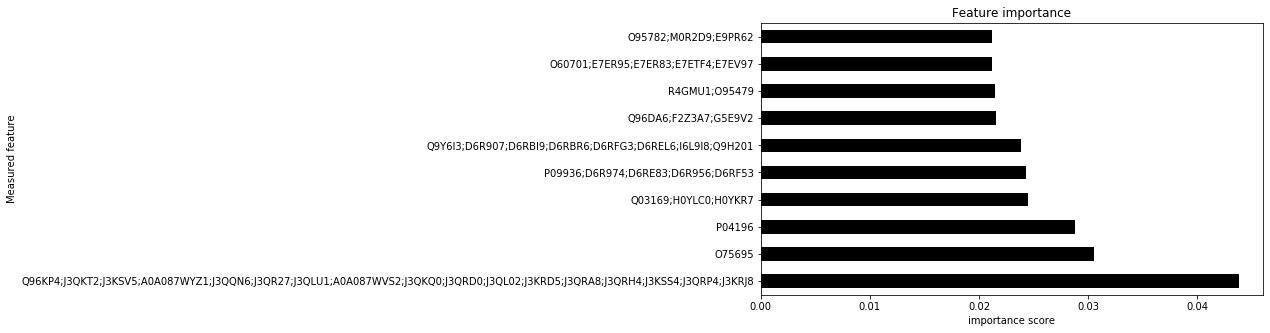

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5))
feat_importances.nlargest(10).plot(kind='barh', color='black')
plt.title("Feature importance")
plt.ylabel("Measured feature")
plt.xlabel("importance score")

In [30]:
#import seaborn as sb
#sbp=sb.pairplot(df_filtered_log2,hue=labelN)

In [31]:
import seaborn as sb
def select_uniprot(protID1,protID2,lab):
    #ax = sb.pointplot(protID1,protID2,hue=lab,join=False,dodge=True, data=df_filtered_log2)
    ax = sb.scatterplot(protID1,protID2,hue=lab,alpha=0.5,data=df_filtered_log2)
uniprot1 = df_filtered_log2.columns
uniprot2 = df_filtered_log2.columns
label = df_filtered_log2.columns
interact(select_uniprot, protID1=uniprot1, protID2=uniprot2,lab=label)

interactive(children=(Dropdown(description='protID1', options=('Transformert (T) og Ikke-T (IT)', 'transformas…

<function __main__.select_uniprot(protID1, protID2, lab)>

In [ ]:
#sbp.savefig(home/inpD/".".join([protn,labelN,"output.svg"]))
uniprot2='O95396'
#uniprot2='G3V1B8;H0YEB6;O60232;E9PN57;H0YEK1'
#uniprot2='P17066;P48741'
#uniprot2='A0A087X0I3;B4E3Q4;Q9NZK5'
uniprot1='Q9H2P9'
#uniprot2='Q9H2P9'
#ax = sb.pointplot(uniprot1,uniprot2,hue=labelN,join=False,dodge=True, data=df_filtered_log2)
ax = sb.lmplot(uniprot1,uniprot2, x_jitter=1, y_jitter=1,hue=labelN,scatter_kws={'s':6},height=8.27, aspect=11.7/8.27,data=df_filtered_log2)
fig = ax#.get_figure() 
fig.savefig(home/inpD/".".join([uniprot1,uniprot2,labelN,ratio,"output.svg"]))

In [ ]:
df_filtered_log2.describe(include='all').T

In [ ]:
#https://nbviewer.jupyter.org/github/noklam/SHAP_Exploration/blob/master/Tree%20model%20interpreation%20with%20SHAP.ipynb
#!pip install git+https://github.com/fastai/fastai

In [ ]:
!pip install fastai==0.7.0  #https://forums.fast.ai/t/no-module-named-fastai-structured-google-colab/23820/2

In [ ]:
import torch
Device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(Device)
print(Device)

In [ ]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [ ]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [32]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_, 'std':np.std([tree.feature_importances_ for tree in m.estimators_],axis=0)}).sort_values('imp', ascending=False)

In [33]:
def plot_fi(fi,std=True, feature_importance_type=''):
    if std: 
        ax = fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False, xerr='std')
    else:
        ax = fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
    ax.set_xlabel(f"{feature_importance_type} Feature Importance")
    return ax

In [34]:
from sklearn import preprocessing
preprocessing.LabelEncoder().fit_transform(df_filtered_log2['Group27'])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
#set_rf_samples(5)
m = RandomForestClassifier()#n_estimators=3, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
X_train, y_train = df_filtered.filter(regex=('|'.join(protN))).fillna(1).apply(np.log2), preprocessing.LabelEncoder().fit_transform(df_filtered_log2['Group27'])
m.fit(X_train, y_train )

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
X_valid=X_train
y_valid=y_train
print_score(m)

In [ ]:
n = 3
sample_idx = np.random.permutation(len(X_valid))[:n]
X_valid_sample = X_valid.iloc[sample_idx].copy()
y_valid_sample = y_valid[sample_idx].copy()
X_valid_sample.shape, y_valid_sample.shape

In [ ]:
fi_sklearn = rf_feat_importance(m, X_valid_sample); fi_sklearn[:10]

In [ ]:
plot_fi(fi_sklearn[:],False, 'Sklearn');

In [ ]:
!pip install rfpimp

In [ ]:
from rfpimp import importances
fi_permutation = importances(m, X_valid_sample, y_valid_sample) # permutation

In [ ]:
fi_permutation.sum()

In [ ]:
fi_permutation['Importance'] = fi_permutation['Importance']/ fi_permutation['Importance'].sum()

In [ ]:
fi_permutation = (fi_permutation
                  .reset_index()
                  .rename({'Feature':'cols', 'Importance':'imp'},axis=1))

In [ ]:
plot_fi(fi_permutation[:],False,'Permutation')

In [ ]:
explainer = shap.TreeExplainer(m)
shap_values = explainer.shap_values(X_valid_sample.values.astype(int))
explainer.expected_value

In [ ]:
%%perl
open(F,"proteinGroupsSILACmedianInverted.txt");
while(<F>){$cnt++;
    if($cnt<10){print join(",",split(/\t/,$_))}
}